# Classificação com Árvore de Decisão e Naive Bayes

Funcionamento de dois modelos supervisionados do `scikit-learn`: **Árvore de Decisão** e **Naive Bayes**.

In [ ]:
#Importar bibliotecas
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

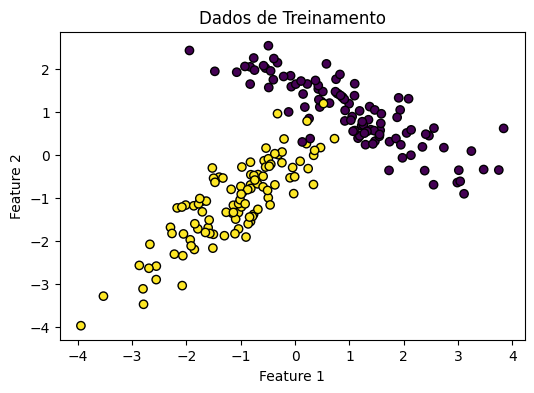

In [ ]:
#Geração e visualização dos dados

X, y = make_classification(n_samples=300, n_features=2, n_redundant=0,
                           n_informative=2, n_clusters_per_class=1,
                           n_classes=2, random_state=49)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

plt.figure(figsize=(6,4))
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap='viridis', edgecolor='k')
plt.title('Dados de Treinamento')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


#Treinamento dos modelos

In [ ]:
#Modelo 1: Árvore de Decisão


dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

#Modelo 2: Naive Bayes

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)


#Avaliação do modelo de classificação
Relatório de métricas

In [ ]:
print(f'Acurácia da Árvore de Decisão: {accuracy_score(y_test, y_pred_dt):.2f}')
print(classification_report(y_test, y_pred_dt))

print(f'Acurácia do Naive Bayes: {accuracy_score(y_test, y_pred_nb):.2f}')
print(classification_report(y_test, y_pred_nb))


Acurácia da Árvore de Decisão: 0.97
              precision    recall  f1-score   support

           0       0.98      0.96      0.97        47
           1       0.95      0.98      0.97        43

    accuracy                           0.97        90
   macro avg       0.97      0.97      0.97        90
weighted avg       0.97      0.97      0.97        90

Acurácia do Naive Bayes: 0.97
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        47
           1       1.00      0.93      0.96        43

    accuracy                           0.97        90
   macro avg       0.97      0.97      0.97        90
weighted avg       0.97      0.97      0.97        90



Confusion matrix, without normalization
[[45  2]
 [ 1 42]]
Normalized confusion matrix
[[0.95744681 0.04255319]
 [0.02325581 0.97674419]]


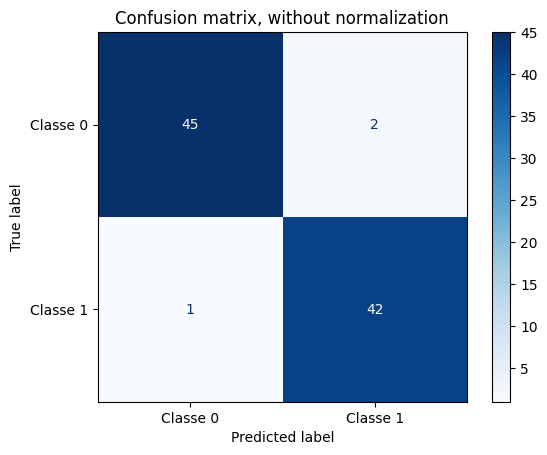

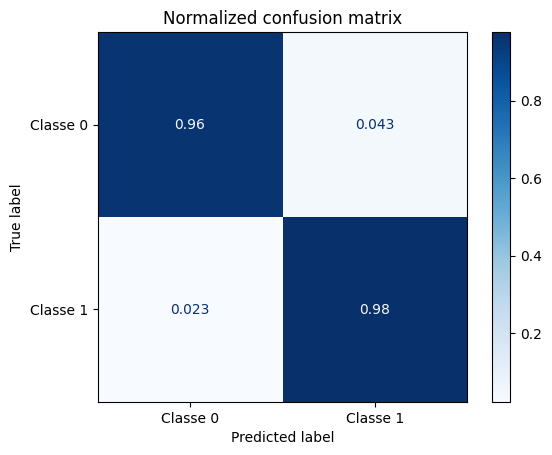

In [ ]:
# Plot non-normalized confusion matrix
class_names=['Classe 0', 'Classe 1']
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        dt_model,
        X_test,
        y_test,
        display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

#Visualização da árvore

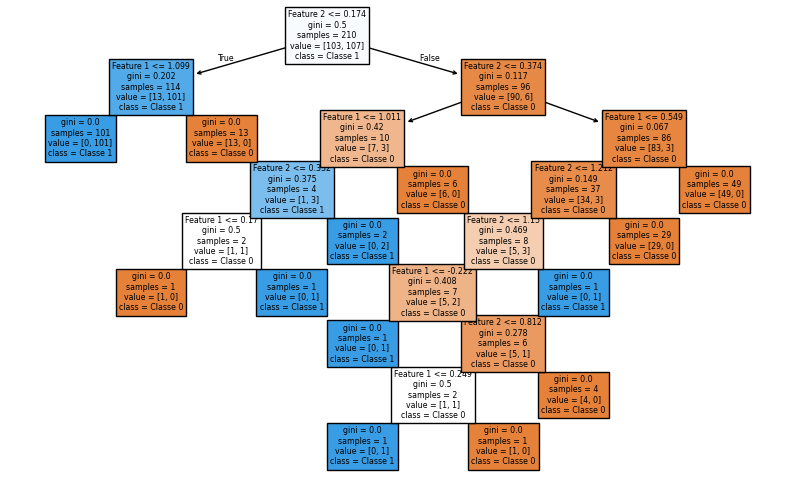

In [ ]:
#Visualizar a Árvore

plt.figure(figsize=(10,6))
plot_tree(dt_model, filled=True, feature_names=['Feature 1', 'Feature 2'], class_names=['Classe 0', 'Classe 1', 'Classe 2'])
plt.show()

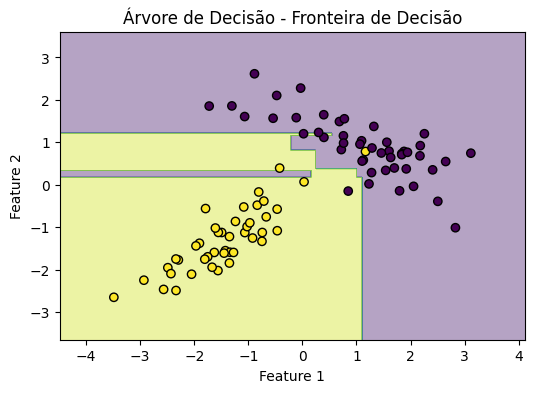

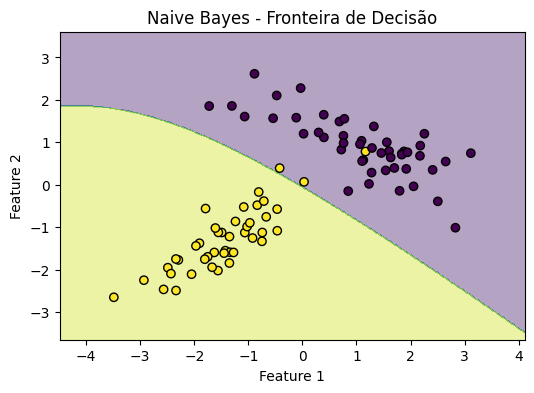

In [ ]:
#Função para Plotar Fronteira de Decisão

def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(6,4))
    plt.contourf(xx, yy, Z, alpha=0.4, cmap='viridis')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

#Fronteiras de Decisão

plot_decision_boundary(dt_model, X_test, y_test, 'Árvore de Decisão - Fronteira de Decisão')
plot_decision_boundary(nb_model, X_test, y_test, 'Naive Bayes - Fronteira de Decisão')

#Quando empregar cada modelo

    *Árvore de Decisão
        Quando deseja um modelo fácil de interpretar e explicar.
        Quando as relações entre os atributos são complexas.

    *Naive Bayes
        Quando precisa de um modelo rápido e simples.
        Quando as caracteristicas são "mais" independentes.
